In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from calibration_errors import get_bias

In [3]:
from v3_calc import Simons_Observatory_V3_LA_beams
import healpy as hp


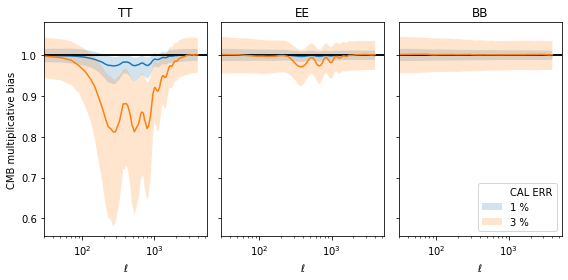

In [4]:
figsize=(8, 4)
fig, axs = plt.subplots(1, 3, sharey=True, figsize=figsize)
cal_errors = [0.01, 0.03]
for cal_error in cal_errors:
    delta = np.random.normal(size=(1000, 1, 6)) * cal_error
    for ax, field in zip(axs, 'TT EE BB'.split()):
        plt.sca(ax)
        ell, num, den = get_bias(delta, field)  # <-- cmb bias evaluation
        plt.axhline(1, color='k')
        ps_factor = (num / den)**2
        median, low, high =  np.percentile(ps_factor, [50, 18, 82], axis=0)
        plt.semilogx(ell, median)
        plt.fill_between(ell, low, high, alpha=0.2, label=f'{cal_error*100:.0f} %')
        plt.title(field)
        plt.xlim(30, None)
        plt.xlabel('$\ell$')
        
plt.plot(-1, 1, lw=0, label='CAL ERR')
axs[0].set_ylabel('CMB multiplicative bias')
axs[-1].legend(loc=4)
plt.tight_layout()

In [5]:
fwhms = Simons_Observatory_V3_LA_beams()
bls = [hp.gauss_beam(np.radians(fwhm/60), np.ceil(ell.max())) for fwhm in fwhms]

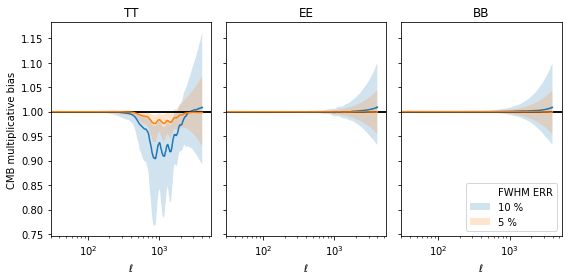

In [7]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=figsize)
cal_errors = [0.1, 0.05]
for cal_error in cal_errors:
    factors = np.random.normal(size=(1000, 6)) * cal_error + 1
    measured_bls = [[hp.gauss_beam(np.radians(fwhm * f / 60), np.ceil(ell.max())) for f, fwhm in zip(factor, fwhms)] for factor in factors]
    measured_bls = np.array(measured_bls)
    delta = bls / measured_bls - 1.0
    delta = delta[..., ell.astype(int)]
    delta = np.swapaxes(delta, -1, -2)
    
    for ax, field in zip(axs, 'TT EE BB'.split()):
        plt.sca(ax)
        ell, num, den = get_bias(delta, field)  # <-- cmb bias evaluation
        plt.axhline(1, color='k')
        ps_factor = (num / den)**2
        median, low, high =  np.percentile(ps_factor, [50, 18, 82], axis=0)
        plt.semilogx(ell, median)
        plt.fill_between(ell, low, high, alpha=0.2, label=f'{cal_error*100:.0f} %')
        plt.title(field)
        plt.xlim(30, None)
        plt.xlabel('$\ell$')

plt.plot(-1, 1, lw=0, label='FWHM ERR')
axs[-1].legend(loc=4)
axs[0].set_ylabel('CMB multiplicative bias')
plt.tight_layout()